In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_excel("Business Case Uliana - Data.xlsx")
df.head()

,Date,City,Marketing Spend (€),New Users,Total Orders,Marketplace Orders,Delivery Orders,Total GMV (€),Marketplace GMV (€),Delivery GMV (€),Avg Delivery Time (min),Late Orders (%),Driver Cancellations,Avg Rating
0,2023-07-01,Metro City,5000,450,12500,10140,2360,254720,202800,51920,28,0.05,125,4.8
1,2023-07-08,Metro City,5200,460,12800,10315,2485,260970,206300,54670,28,0.04,128,4.7
2,2023-07-15,Metro City,4800,410,12200,9839,2361,248722,196780,51942,28,0.03,122,4.8
3,2023-07-22,Metro City,6000,550,13500,10664,2836,275672,213280,62392,30,0.05,135,4.6
4,2023-07-29,Metro City,5500,490,13000,10550,2450,264900,211000,53900,29,0.05,130,4.8


In [3]:
# Convert date column
df["Date"] = pd.to_datetime(df["Date"])

# Convert late orders from % to .0
df["Late Orders (%)"] = (
    df["Late Orders (%)"]
    .astype(str)
    .str.replace("%", "")
    .str.replace(" ", "")
    .astype(float)
)

# Sort
df = df.sort_values(["City", "Date"]).reset_index(drop=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     30 non-null     datetime64[ns]
 1   City                     30 non-null     object        
 2   Marketing Spend (€)      30 non-null     int64         
 3   New Users                30 non-null     int64         
 4   Total Orders             30 non-null     int64         
 5   Marketplace Orders       30 non-null     int64         
 6   Delivery Orders          30 non-null     int64         
 7   Total GMV (€)            30 non-null     int64         
 8   Marketplace GMV (€)      30 non-null     int64         
 9   Delivery GMV (€)         30 non-null     int64         
 10  Avg Delivery Time (min)  30 non-null     int64         
 11  Late Orders (%)          30 non-null     float64       
 12  Driver Cancellations     30 non-null  

In [4]:
# Delivery share
df["Delivery Share"] = df["Delivery Orders"] / df["Total Orders"]

# Marketing efficiency KPIs
df["CAC (€ per New User)"] = df["Marketing Spend (€)"] / df["New Users"]
df["Orders per € Marketing"] = df["Total Orders"] / df["Marketing Spend (€)"]

# Week-over-week changes
df["Orders_WoW_%"] = df.groupby("City")["Total Orders"].pct_change() * 100
df["GMV_WoW_%"] = df.groupby("City")["Total GMV (€)"].pct_change() * 100

# Delivery operational changes
df["DeliveryTime_WoW"] = df.groupby("City")["Avg Delivery Time (min)"].diff()

df.head(10)


,Date,City,Marketing Spend (€),New Users,Total Orders,Marketplace Orders,Delivery Orders,Total GMV (€),Marketplace GMV (€),Delivery GMV (€),Avg Delivery Time (min),Late Orders (%),Driver Cancellations,Avg Rating,Delivery Share,CAC (€ per New User),Orders per € Marketing,Orders_WoW_%,GMV_WoW_%,DeliveryTime_WoW
0,2023-07-01,Metro City,5000,450,12500,10140,2360,254720,202800,51920,28,0.05,125,4.8,0.188800,11.111111,2.500000,NaN,NaN,NaN
1,2023-07-08,Metro City,5200,460,12800,10315,2485,260970,206300,54670,28,0.04,128,4.7,0.194141,11.304348,2.461538,2.400000,2.453675,0.0
2,2023-07-15,Metro City,4800,410,12200,9839,2361,248722,196780,51942,28,0.03,122,4.8,0.193525,11.707317,2.541667,-4.687500,-4.693260,0.0
3,2023-07-22,Metro City,6000,550,13500,10664,2836,275672,213280,62392,30,0.05,135,4.6,0.210074,10.909091,2.250000,10.655738,10.835391,2.0
4,2023-07-29,Metro City,5500,490,13000,10550,2450,264900,211000,53900,29,0.05,130,4.8,0.188462,11.224490,2.363636,-3.703704,-3.907542,-1.0
5,2023-08-05,Metro City,5100,440,12600,10096,2504,257008,201920,55088,27,0.04,126,4.7,0.198730,11.590909,2.470588,-3.076923,-2.979237,-2.0
6,2023-08-12,Metro City,5300,470,12900,10549,2351,262702,210980,51722,29,0.03,129,4.8,0.182248,11.276596,2.433962,2.380952,2.215495,2.0
7,2023-08-19,Metro City,8000,900,15000,10500,4500,309000,210000,99000,45,0.18,400,3.9,0.300000,8.888889,1.875000,16.279070,17.623771,16.0
8,2023-08-26,Metro City,5500,480,13100,10475,2625,267250,209500,57750,30,0.05,131,4.6,0.200382,11.458333,2.381818,-12.666667,-13.511327,-15.0
9,2023-09-02,Metro City,5600,500,13300,10724,2576,271152,214480,56672,28,0.05,133,4.8,0.193684,11.200000,2.375000,1.526718,1.460056,-2.0


In [5]:
# i summarize all the KPIs by city
summary_kpis = df.groupby("City").agg({
    "Total Orders": "mean",
    "Marketplace Orders": "mean",
    "Delivery Orders": "mean",
    "Total GMV (€)": "mean",
    "Delivery Share": "mean",
    "CAC (€ per New User)": "mean",
    "Late Orders (%)": "mean",
    "Avg Delivery Time (min)": "mean",
    "Avg Rating": "mean"
}).round(2)

summary_kpis


,Total Orders,Marketplace Orders,Delivery Orders,Total GMV (€),Delivery Share,CAC (€ per New User),Late Orders (%),Avg Delivery Time (min),Avg Rating
City,,,,,,,,,
Metro City,13090.0,10385.2,2704.8,267209.6,0.21,11.07,0.06,30.2,4.65
Suburbia Hills,4240.0,3410.8,829.2,86458.4,0.20,16.93,0.21,48.5,3.79
Uni Town,2340.0,1876.8,463.2,47726.4,0.20,9.52,0.02,22.6,4.81


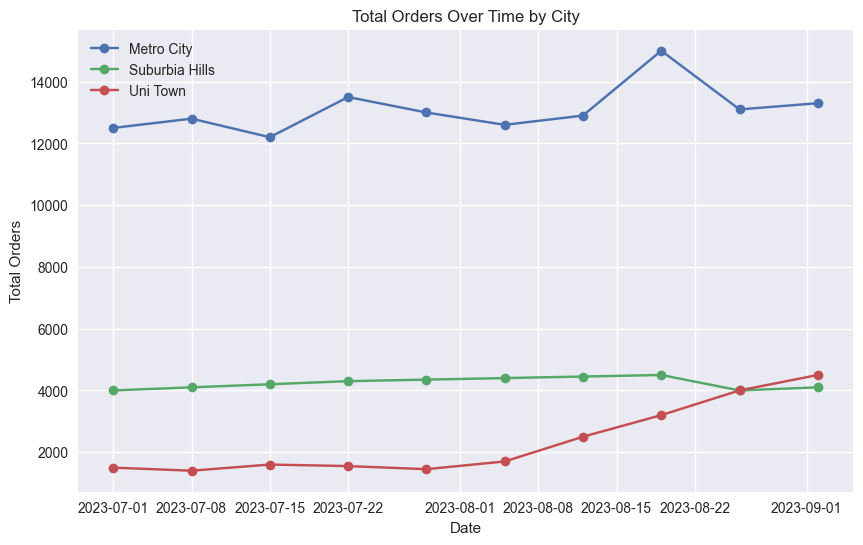

In [7]:
# Plot: total orders over Time by city
plt.figure(figsize=(10,6))

for city in df["City"].unique():
    subset = df[df["City"] == city]
    plt.plot(subset["Date"], subset["Total Orders"], marker="o", label=city)

plt.title("Total Orders Over Time by City")
plt.xlabel("Date")
plt.ylabel("Total Orders")
plt.legend()
plt.grid(True)
plt.show()


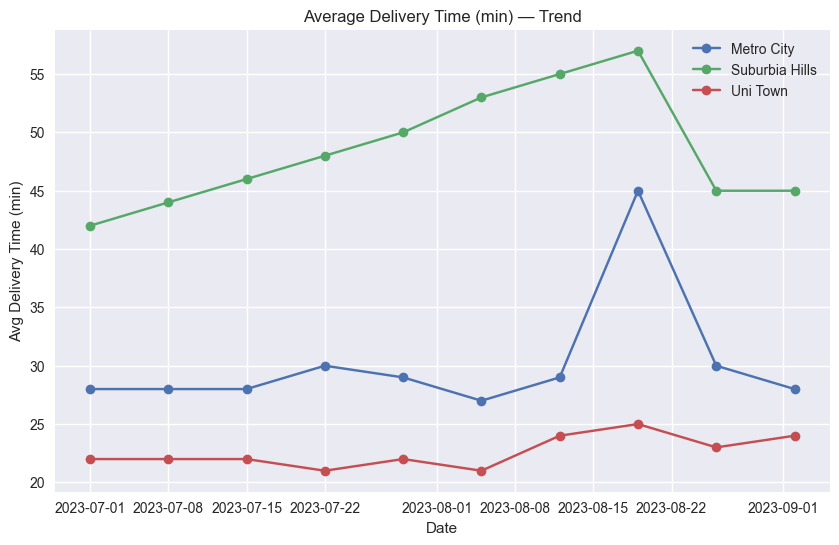

In [8]:
# using sequence to show the delivery time trend per city
plt.figure(figsize=(10,6))

for city in df["City"].unique():
    subset = df[df["City"] == city]
    plt.plot(subset["Date"], subset["Avg Delivery Time (min)"], marker="o", label=city)

plt.title("Average Delivery Time (min) — Trend")
plt.xlabel("Date")
plt.ylabel("Avg Delivery Time (min)")
plt.legend()
plt.grid(True)
plt.show()


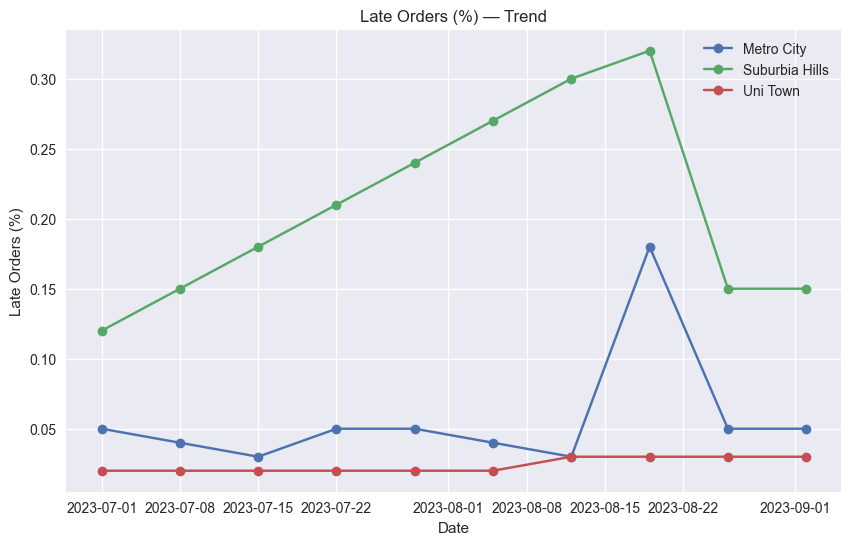

In [ ]:
# the % ratio of late orders in the total
plt.figure(figsize=(10,6))

for city in df["City"].unique():
    subset = df[df["City"] == city]
    plt.plot(subset["Date"], subset["Late Orders (%)"], marker="o", label=city)

plt.title("Late Orders (%) — Trend")
plt.xlabel("Date")
plt.ylabel("Late Orders (%)")
plt.legend()
plt.grid(True)
plt.show()


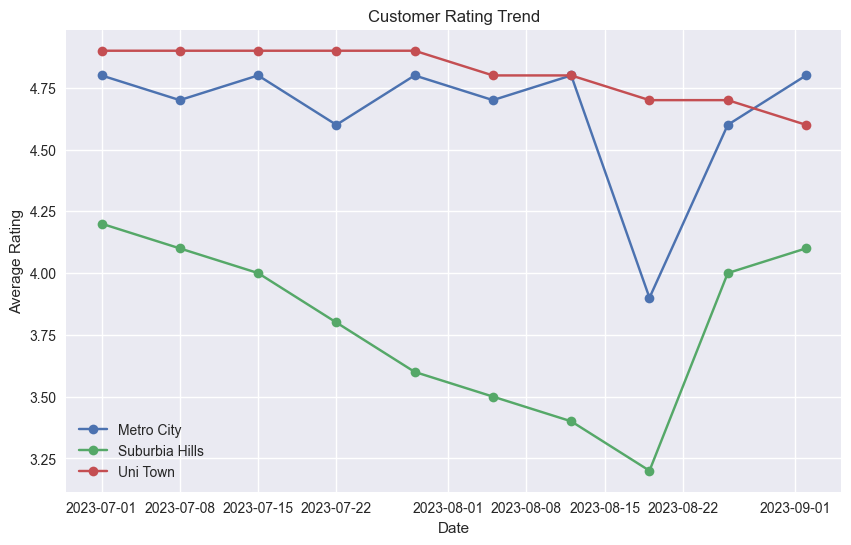

In [23]:
# the average rating per city on diff dates

plt.figure(figsize=(10,6))

for city in df["City"].unique():
    subset = df[df["City"] == city]
    plt.plot(subset["Date"], subset["Avg Rating"], marker="o", label=city)

plt.title("Customer Rating Trend")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.legend()
plt.grid(True)
plt.show()


In [16]:

# avg order Value (GMV / Orders) - finance would care about the value per order and margin implications
df["AOV (€)"] = df["Total GMV (€)"] / df["Total Orders"]


# Order mix: Marketplace vs Delivery -  impacts both margin and operational workload, as marketplace 
#higher margin and lower costs, whereas delivery has lower margin and higher costs
df["Marketplace Share (Orders)"] = df["Marketplace Orders"] / df["Total Orders"]
df["Delivery Share (Orders)"] = df["Delivery Orders"] / df["Total Orders"]

# GMV mix (how much money comes from each model) - we see the distribution of revenue
df["Marketplace Share (GMV)"] = df["Marketplace GMV (€)"] / df["Total GMV (€)"]
df["Delivery Share (GMV)"] = df["Delivery GMV (€)"] / df["Total GMV (€)"]
# This shows Finance how revenue is distributed.

# Cancellations per 1000 orders = operational stress indicator - if high, means customer experience is bad
# leading to lower repeat rate, hence, lower long term growth
df["Cancels per 1000 Orders"] = df["Driver Cancellations"] / df["Total Orders"] * 1000
# High cancellations → poor customer experience → lower repeat rate → lower long-term growth

df.head()



,Date,City,Marketing Spend (€),New Users,Total Orders,Marketplace Orders,Delivery Orders,Total GMV (€),Marketplace GMV (€),Delivery GMV (€),...,Orders per € Marketing,Orders_WoW_%,GMV_WoW_%,DeliveryTime_WoW,AOV (€),Marketplace Share (Orders),Delivery Share (Orders),Marketplace Share (GMV),Delivery Share (GMV),Cancels per 1000 Orders
0,2023-07-01,Metro City,5000,450,12500,10140,2360,254720,202800,51920,...,2.500000,NaN,NaN,NaN,20.377600,0.811200,0.188800,0.796168,0.203832,10.0
1,2023-07-08,Metro City,5200,460,12800,10315,2485,260970,206300,54670,...,2.461538,2.400000,2.453675,0.0,20.388281,0.805859,0.194141,0.790512,0.209488,10.0
2,2023-07-15,Metro City,4800,410,12200,9839,2361,248722,196780,51942,...,2.541667,-4.687500,-4.693260,0.0,20.387049,0.806475,0.193525,0.791164,0.208836,10.0
3,2023-07-22,Metro City,6000,550,13500,10664,2836,275672,213280,62392,...,2.250000,10.655738,10.835391,2.0,20.420148,0.789926,0.210074,0.773673,0.226327,10.0
4,2023-07-29,Metro City,5500,490,13000,10550,2450,264900,211000,53900,...,2.363636,-3.703704,-3.907542,-1.0,20.376923,0.811538,0.188462,0.796527,0.203473,10.0


In [17]:
# finance and marketing summary table - we will identify which cities are efficient - roi etc
# also will see where gmv and aov are bad or good and

finance_marketing_summary = df.groupby("City").agg({
    "Total Orders": "mean",
    "Total GMV (€)": "mean",
    "AOV (€)": "mean",
    "Marketplace Share (Orders)": "mean",
    "Delivery Share (Orders)": "mean",
    "Marketplace Share (GMV)": "mean",
    "Delivery Share (GMV)": "mean",
    "CAC (€ per New User)": "mean",
    "Orders per € Marketing": "mean"
}).round(2)

finance_marketing_summary


,Total Orders,Total GMV (€),AOV (€),Marketplace Share (Orders),Delivery Share (Orders),Marketplace Share (GMV),Delivery Share (GMV),CAC (€ per New User),Orders per € Marketing
City,,,,,,,,,
Metro City,13090.0,267209.6,20.41,0.79,0.21,0.78,0.22,11.07,2.37
Suburbia Hills,4240.0,86458.4,20.39,0.80,0.20,0.79,0.21,16.93,1.52
Uni Town,2340.0,47726.4,20.40,0.80,0.20,0.78,0.22,9.52,2.45


In [18]:
# for logistics also one to show whether the logistics have caused any problems or impacted the volume drops 
# metrics like delivery time, late orders, ratings - will also help marketing with decisions
ops_summary = df.groupby("City").agg({
    "Avg Delivery Time (min)": "mean",
    "Late Orders (%)": "mean",
    "Cancels per 1000 Orders": "mean",
    "Avg Rating": "mean"
}).round(2)

ops_summary


,Avg Delivery Time (min),Late Orders (%),Cancels per 1000 Orders,Avg Rating
City,,,,
Metro City,30.2,0.06,11.67,4.65
Suburbia Hills,48.5,0.21,16.14,3.79
Uni Town,22.6,0.02,4.84,4.81


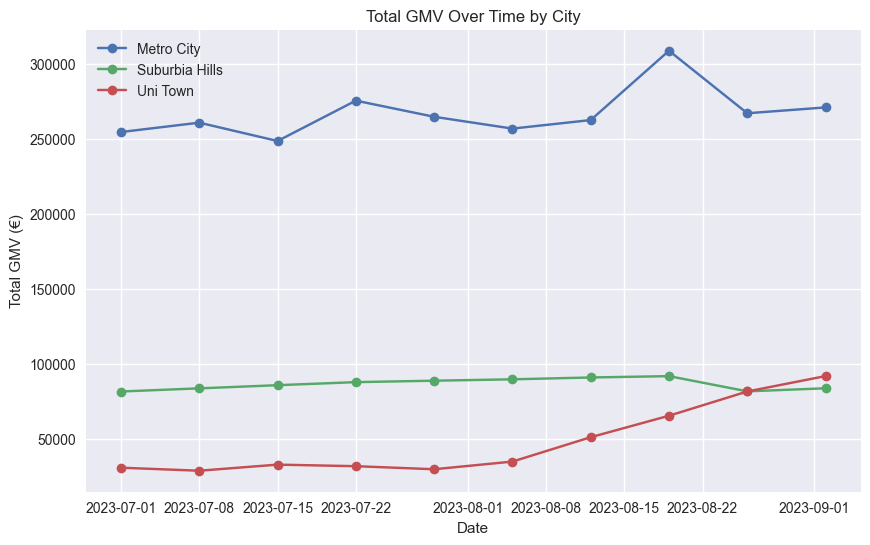

In [ ]:
# we will also take a look at gmv over timeline by city, will be helpful for both finance and management 
#will show the alignment of value growth with order growth 
# ! Useful to detect shrinking basket sizes or shifting mix
plt.figure(figsize=(10, 6))

for city in df["City"].unique():
    subset = df[df["City"] == city]
    plt.plot(subset["Date"], subset["Total GMV (€)"], marker="o", label=city)

plt.title("Total GMV Over Time by City")
plt.xlabel("Date")
plt.ylabel("Total GMV (€)")
plt.legend()
plt.grid(True)
plt.show()


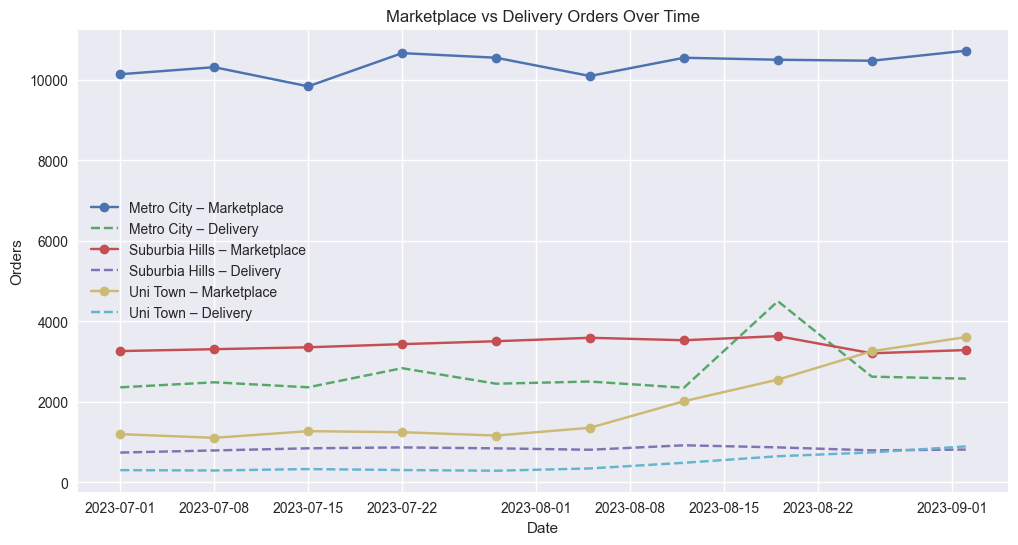

In [20]:
# will compare again marketplace and delivery over tuime, will help see the reasoing for profitability of a city
# MARKETPLACE vs DELIVERY ORDERS OVER TIME
#  Marketplace = high margin, low operational cost
# Delivery = low margin, operational complexity
# - Mix shifts change profitability and needed capacity


plt.figure(figsize=(12, 6))

for city in df["City"].unique():
    subset = df[df["City"] == city]
    
    # Marketplace trend
    plt.plot(subset["Date"], subset["Marketplace Orders"], 
             marker="o", linestyle="-", label=f"{city} – Marketplace")
    
    # Delivery trend
    plt.plot(subset["Date"], subset["Delivery Orders"], 
             marker="x", linestyle="--", label=f"{city} – Delivery")

plt.title("Marketplace vs Delivery Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Orders")
plt.legend()
plt.grid(True)
plt.show()


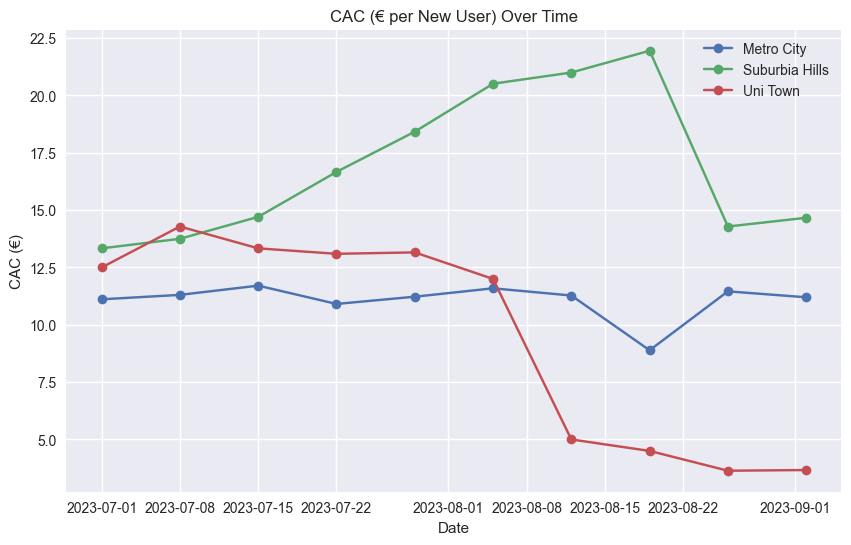

In [21]:
# cac trend by city- customer aquisition cost
# main ides CAC rising = marketing efficiency falling. thereofre marketing should be cautious with cities where acquisition is cheaper
# can help justify budget allocation recommendations

plt.figure(figsize=(10, 6))

for city in df["City"].unique():
    subset = df[df["City"] == city]
    plt.plot(subset["Date"], subset["CAC (€ per New User)"], marker="o", label=city)

plt.title("CAC (€ per New User) Over Time")
plt.xlabel("Date")
plt.ylabel("CAC (€)")
plt.legend()
plt.grid(True)
plt.show()


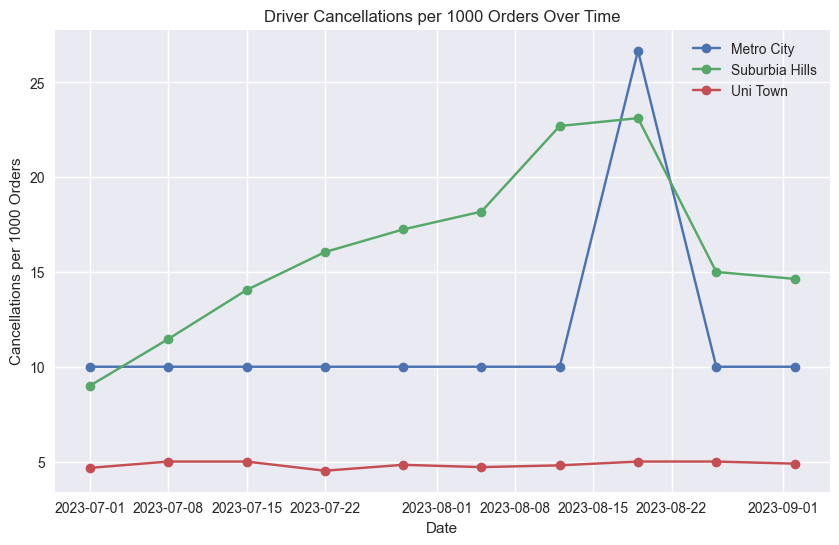

In [22]:
# we will look here at cancellation trends. this might mean insufficient courier supply, correlates with late orders, bad CX
# logistics need to know


plt.figure(figsize=(10, 6))

for city in df["City"].unique():
    subset = df[df["City"] == city]
    plt.plot(subset["Date"], subset["Cancels per 1000 Orders"], marker="o", label=city)

plt.title("Driver Cancellations per 1000 Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Cancellations per 1000 Orders")
plt.legend()
plt.grid(True)
plt.show()
